In [2]:
import torch

In [3]:
import torch
import numpy as np

np_data = np.arange(6).reshape((2, 3))
torch_data = torch.from_numpy(np_data)
tensor2array = torch_data.numpy()
print(
    '\nnumpy array:', np_data,          # [[0 1 2], [3 4 5]]
    '\ntorch tensor:', torch_data,      #  0  1  2 \n 3  4  5    [torch.LongTensor of size 2x3]
    '\ntensor to array:', tensor2array, # [[0 1 2], [3 4 5]]
)


numpy array: [[0 1 2]
 [3 4 5]] 
torch tensor: tensor([[0, 1, 2],
        [3, 4, 5]], dtype=torch.int32) 
tensor to array: [[0 1 2]
 [3 4 5]]


In [7]:
data = [-1,0,1,2];
t1 = torch.tensor(data);
print(type(t1))
print(t1)

<class 'torch.Tensor'>
tensor([-1,  0,  1,  2])


In [6]:
print(t1.abs());
t1 = t1.abs();
print(t1)

tensor([1, 0, 1, 2])
tensor([1, 0, 1, 2])


In [11]:
data = [-1, 0, 1, 2]
t1 = torch.tensor(data).reshape(2,2)
#矩阵乘法
t2 = torch.mm(t1, t1);
print(t2);

tensor([[1, 0],
        [1, 4]])


In [13]:
from torch.autograd import Variable
v = Variable(t1);
print(v);
t3 = v.data();
print(t3)

tensor([[-1,  0],
        [ 1,  2]])


TypeError: 'Tensor' object is not callable

In [17]:
t3 = torch.linspace(-5, 5, 11);
print(t3);

tensor([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])


In [19]:
import torch.nn.functional as F 

In [21]:
a = input()

12


In [25]:
type(a)


str

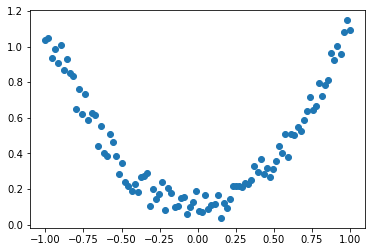

In [26]:
import torch
import matplotlib.pyplot as plt

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# 画图
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [24]:
class Net(torch.nn.Module):  # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        # 定义每层用什么样的形式
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output)   # 输出层线性输出

    def forward(self, x):   # 这同时也是 Module 中的 forward 功能
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.predict(x)             # 输出值
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)

print(net)  # net 的结构

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [27]:
# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)  # 传入 net 的所有参数, 学习率
loss_func = torch.nn.MSELoss()      # 预测值和真实值的误差计算公式 (均方差)

for t in range(100):
    # 喂给 net 训练数据 x, 输出预测值
    prediction = net(x)     

    loss = loss_func(prediction, y)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上


In [28]:
net2 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)

In [29]:
net2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)

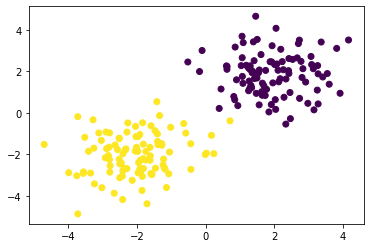

In [67]:
import torch
import matplotlib.pyplot as plt

# 假数据
n_data = torch.ones(100, 2)         # 数据的基本形态
x0 = torch.normal(2*n_data, 1)      # 类型0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # 类型0 y data (tensor), shape=(100, )
x1 = torch.normal(-2*n_data, 1)     # 类型1 x data (tensor), shape=(100, 1)
y1 = torch.ones(100)                # 类型1 y data (tensor), shape=(100, )

#print(x0);
# 注意 x, y 数据的数据形式是一定要像下面一样 (torch.cat 是在合并数据)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # LongTensor = 64-bit integer

# plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
# plt.show()



# 画图

plt.scatter(x.numpy()[:, 0], x.numpy()[:, 1],  c =  y );
#plt.xlim(-5, 2);
#plt.ylim(-5, 2);

plt.show()

In [ ]:
print("x type is", type(x));
print("x.data type is", type(x.data));

print(x.shape)
print(y.shape)
#print(x.numpy())

In [57]:
print(x[:, 0]);

tensor([ 2.0928,  2.7037,  3.7903,  0.9255,  1.9794,  2.5975,  3.2162,  1.1714,
         0.9198,  2.3266,  2.7618,  1.7041,  0.7278,  2.7714,  1.6085,  1.0912,
         0.9103,  3.2649,  1.0939,  0.8605,  5.0031, -0.6704,  3.3859,  3.6278,
         2.5670,  1.4121,  2.1775,  3.8611,  3.0798,  0.1709,  2.8456,  0.1017,
         2.0579,  3.0916,  3.0282,  1.9813,  4.3557,  1.3299,  2.7277,  2.7834,
         1.4496,  1.1090,  1.0317,  1.7785, -1.8677,  1.5734,  3.1896,  0.1049,
         1.3942,  0.9069,  3.4489,  4.1395,  1.4095,  0.9937,  2.1300,  2.8286,
         2.1542,  0.3686,  1.9389,  3.2256,  2.3526,  3.7064,  2.6157,  2.9051,
         2.6823,  1.5459,  2.6819,  3.1037,  1.9810,  0.7229,  1.6374,  1.1009,
         1.7778,  2.1279,  1.5571,  3.0253,  0.4999,  3.0789,  2.3946,  2.9906,
         1.9223,  3.7917,  2.6588,  2.6097,  0.6695,  1.1315,  3.9968,  2.2316,
         2.7189,  2.8713,  1.4463,  2.5266,  0.4982,  1.9557,  4.2809,  2.2738,
         0.6286,  2.3898,  2.8884,  2.77